# Extract sea level data from

http://www.bom.gov.au/oceanography/projects/abslmp/data/index.shtml

e.g.

Broome, 2022: http://www.bom.gov.au/ntc/IDO71013/IDO71013_2022.csv

In [32]:
import pandas as pd
import xarray as xr
from glob import glob

# Not allowed
pd.read_csv('http://www.bom.gov.au/ntc/IDO71013/IDO71013_2022.csv')

# Also not allowed...
!curl http://www.bom.gov.au/ntc/IDO71013/IDO71013_2022.csv -o ../DATA/IDO71013_2022.csv


In [36]:
csvfiles = sorted(glob('../DATA/TIDES/IDO71013*.csv'))


In [37]:
def load_csv(csvfile):
    return pd.read_csv(csvfile, index_col=0, parse_dates=[0]).\
        to_xarray().\
        rename({' Date & UTC Time':'time', 'Sea Level':'waterlevel'})
    
tides = xr.concat([load_csv(ff) for ff in csvfiles], dim='time')

In [38]:
tides

<xarray.Dataset>
Dimensions:              (time: 269520)
Coordinates:
  * time                 (time) datetime64[ns] 1992-01-01 ... 2023-09-30T23:0...
Data variables:
    waterlevel           (time) float64 6.355 6.122 5.687 ... 1.1 0.276 1.658
    Water Temperature    (time) float64 30.5 30.5 30.6 30.6 ... 28.1 28.0 28.1
    Air Temperature      (time) float64 28.4 28.5 28.6 28.8 ... 26.7 26.7 27.1
    Barometric Pressure  (time) float64 1.008e+03 1.008e+03 ... 1.011e+03
    Residuals            (time) float64 -0.011 -0.067 -0.104 ... -0.02 -0.098
    Adjusted Residuals   (time) float64 -0.069 -0.124 -0.161 ... -0.05 -0.125
    Wind Direction       (time) int64 278 281 290 295 282 ... 245 236 238 229
    Wind Gust            (time) float64 6.9 8.2 9.6 9.5 9.8 ... 5.1 5.2 6.4 6.2
    Wind Speed           (time) float64 5.0 5.4 6.5 5.9 7.2 ... 3.3 3.9 5.3 5.1
    Broome               (time) float64 nan nan nan nan nan ... nan nan nan nan

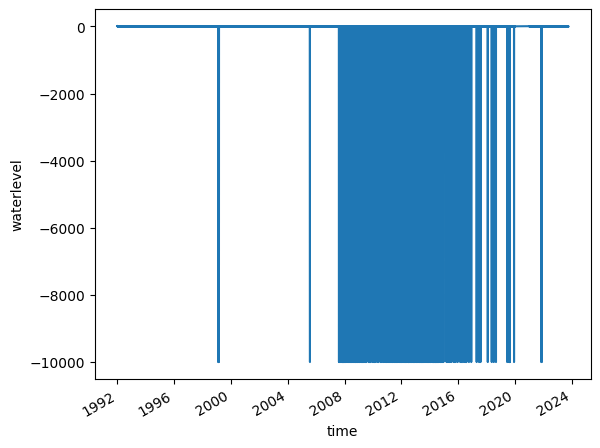

In [39]:
tides['waterlevel'].plot()

In [40]:
tides.to_netcdf('../DATA/TIDES/BroomeTides_19922022.nc')